### Severity distribution per service

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('generated_it_service_data.csv')

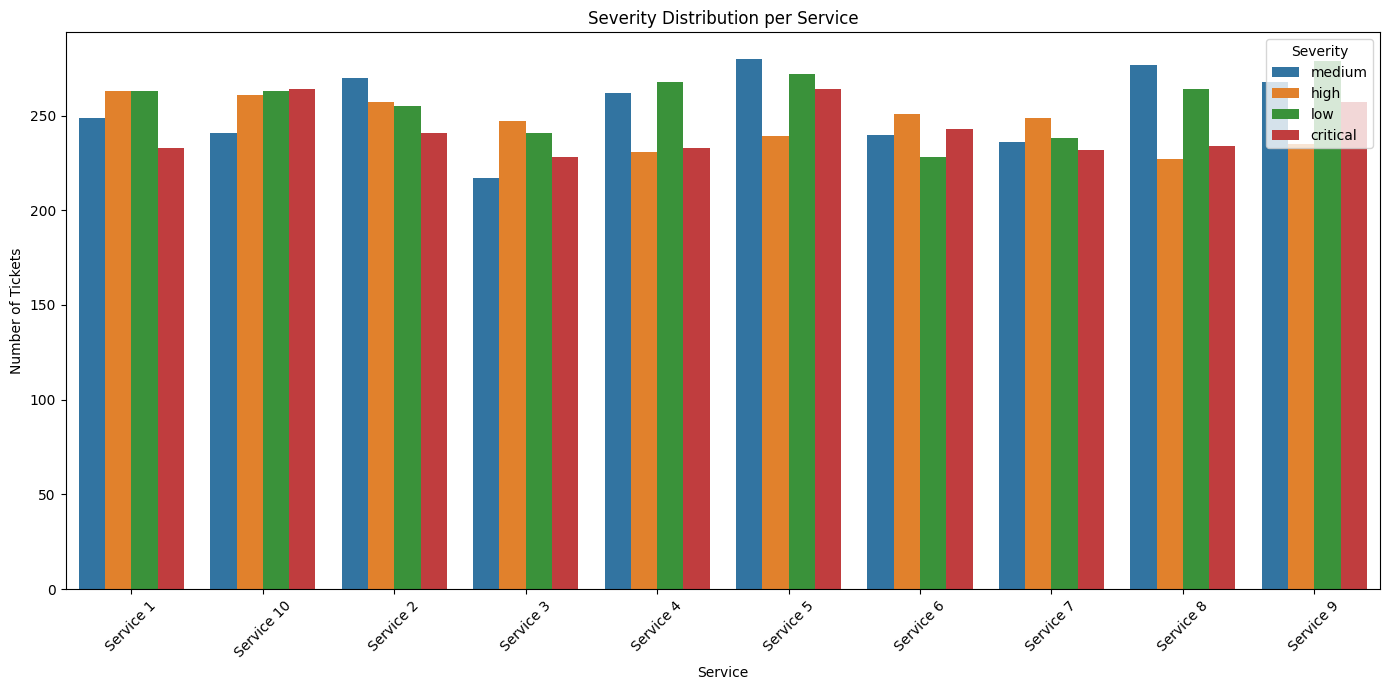

In [3]:

# Convert date columns to datetime
df['logged_date'] = pd.to_datetime(df['logged_date'], format='%m/%d/%Y %H:%M:%S IST')
df['last_updated'] = pd.to_datetime(df['last_updated'], format='%m/%d/%Y %H:%M:%S IST')

# Calculate resolution time in hours
df['resolution_time'] = (df['last_updated'] - df['logged_date']).dt.total_seconds() / 3600

# Plot Severity Distribution per Service
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='service', hue='severity', order=sorted(df['service'].unique()))
plt.title('Severity Distribution per Service')
plt.xlabel('Service')
plt.ylabel('Number of Tickets')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Proportion of Each Severity with Each Service

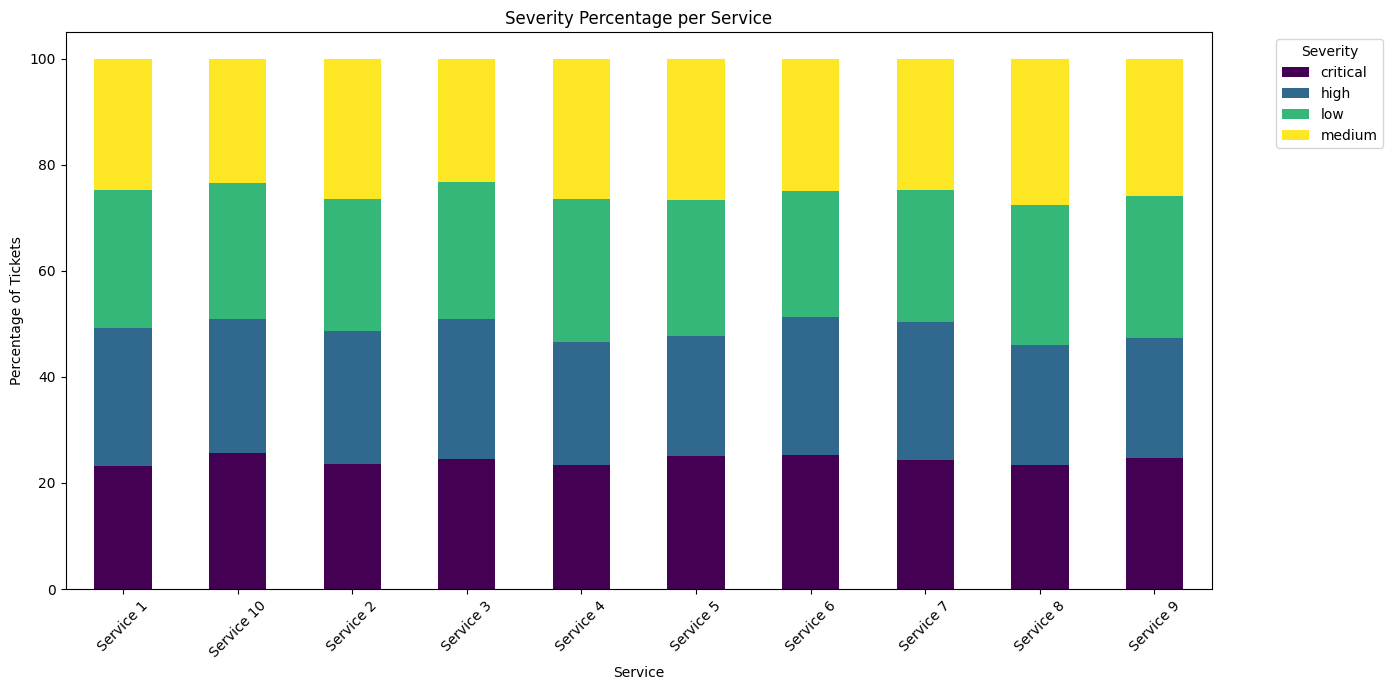

In [5]:
# Calculate the proportion of severity within each service
severity_service = df.groupby(['service', 'severity']).size().unstack(fill_value=0)
severity_service_percentage = severity_service.div(severity_service.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
severity_service_percentage.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Severity Percentage per Service')
plt.xlabel('Service')
plt.ylabel('Percentage of Tickets')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Time based analysis

### Ticket volume by day of week and hour

/tmp/ipykernel_55670/931824326.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=days_order, palette='Set2')


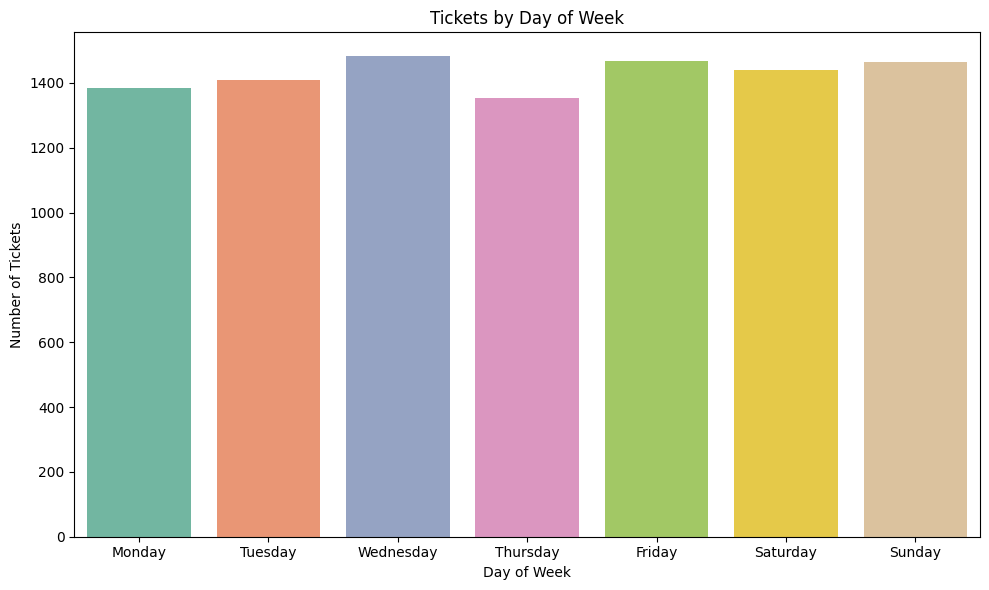

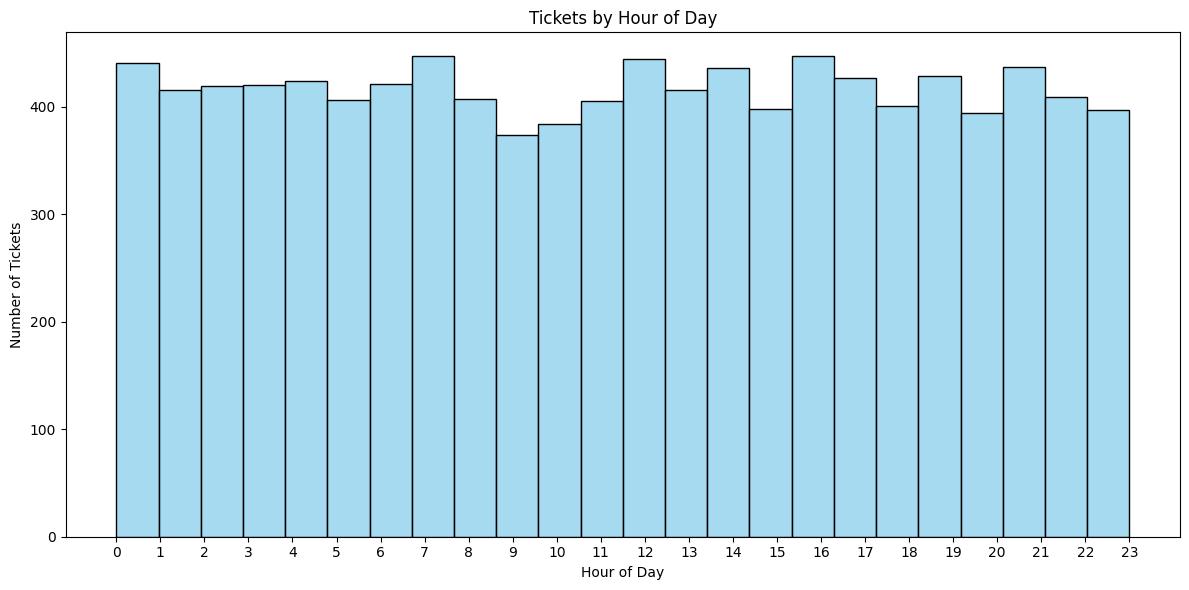

In [6]:
# Extract day of week and hour from logged_date
df['day_of_week'] = df['logged_date'].dt.day_name()
df['hour'] = df['logged_date'].dt.hour

# Order days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Tickets by Day of Week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=days_order, palette='Set2')
plt.title('Tickets by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()

# Plot Tickets by Hour of Day
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, kde=False, color='skyblue')
plt.title('Tickets by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tickets')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### Monthly ticket trends

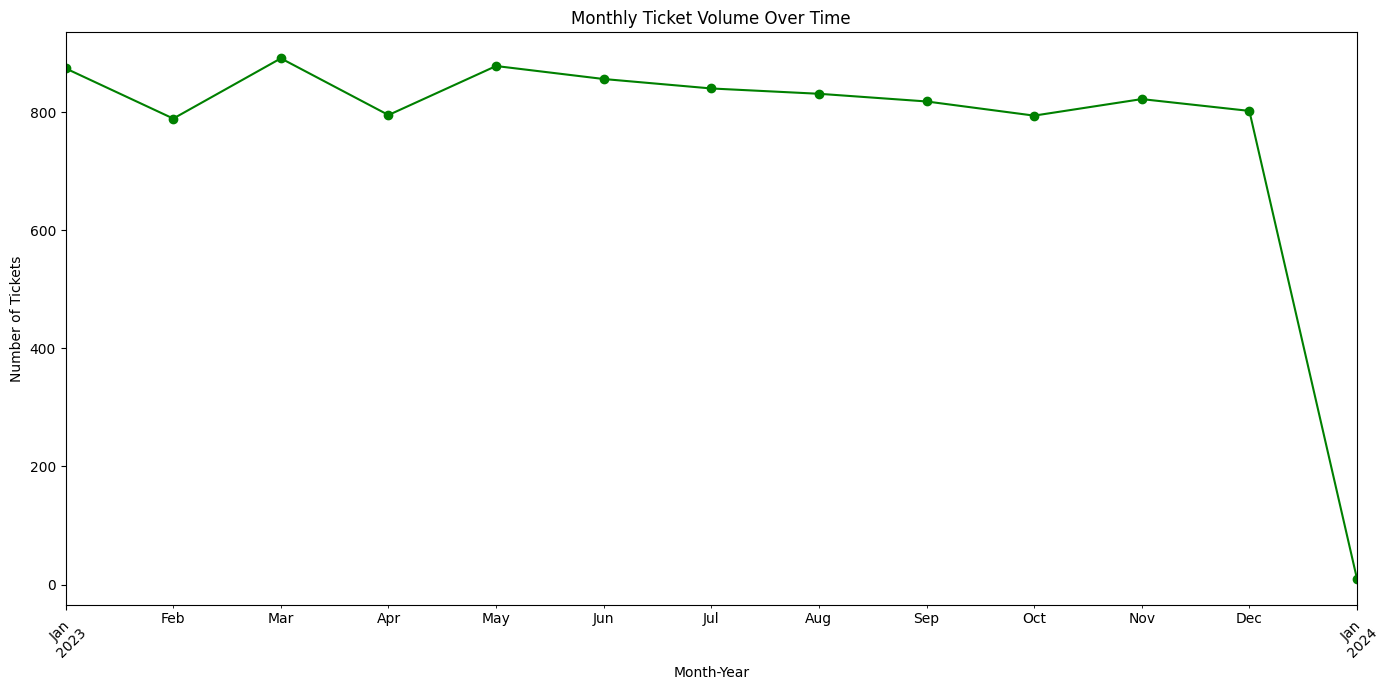

In [7]:
# Extract month and year
df['month_year'] = df['logged_date'].dt.to_period('M')

# Plot Monthly Ticket Volume
ticket_trends_monthly = df.groupby('month_year').size()
ticket_trends_monthly.plot(kind='line', marker='o', figsize=(14, 7), color='green')
plt.title('Monthly Ticket Volume Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Resolution time analysis

### Distribution of resolution times

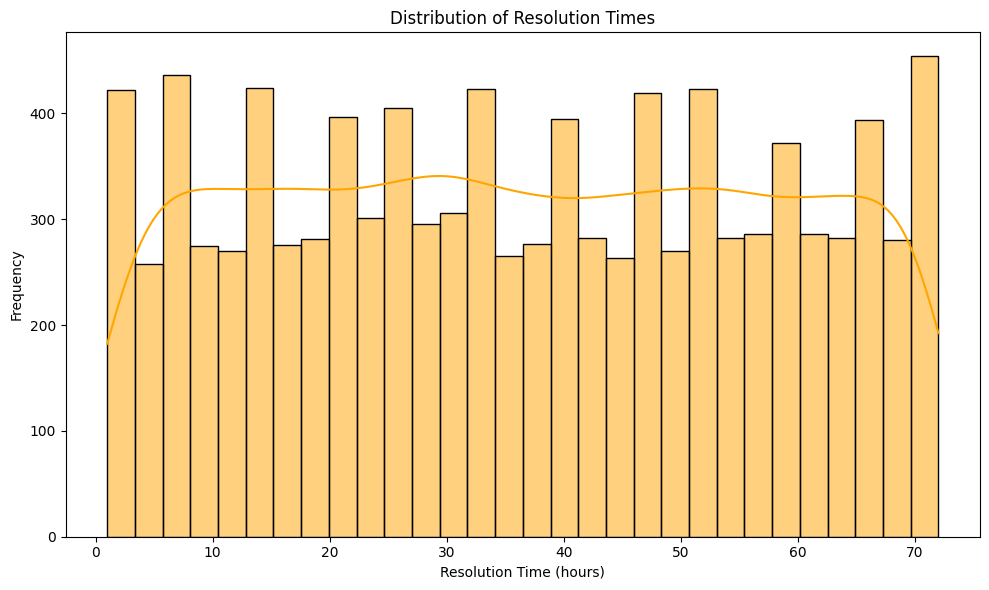

In [8]:
# Plot Histogram of Resolution Times
plt.figure(figsize=(10, 6))
sns.histplot(df['resolution_time'], bins=30, kde=True, color='orange')
plt.title('Distribution of Resolution Times')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Resolution time by service

/tmp/ipykernel_55670/1429472157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='service', y='resolution_time', palette='Set3')


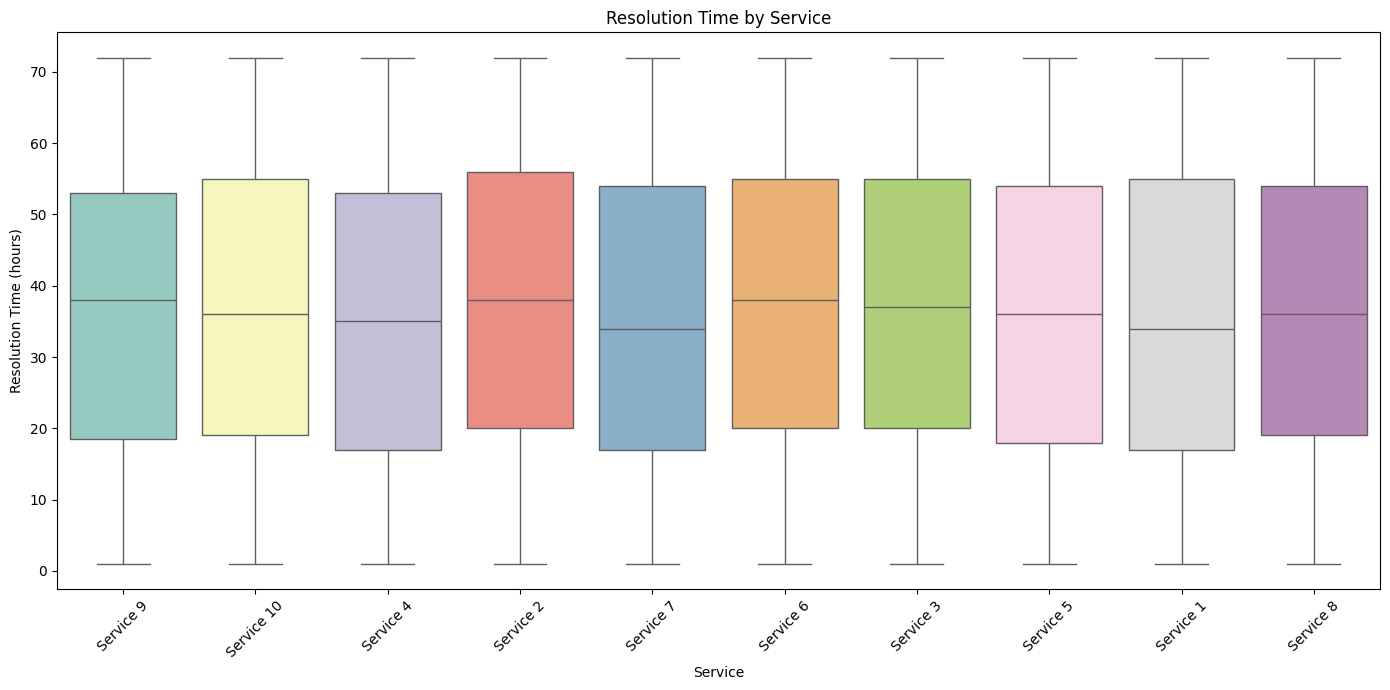

In [9]:
# Plot Boxplot of Resolution Time by Service
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='service', y='resolution_time', palette='Set3')
plt.title('Resolution Time by Service')
plt.xlabel('Service')
plt.ylabel('Resolution Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Resolution time by severity

/tmp/ipykernel_55670/1255756534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='severity', y='resolution_time', order=severity_order, palette='coolwarm')


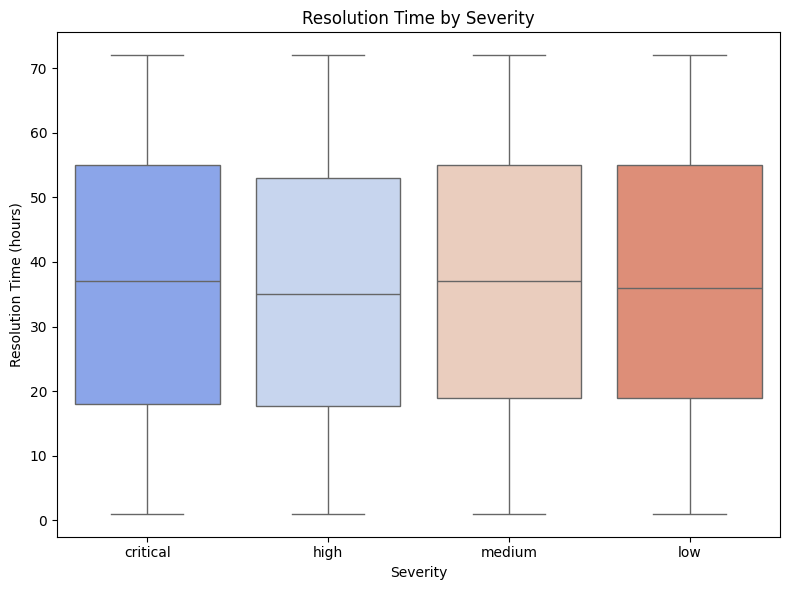

In [10]:
# Order severities
severity_order = ['critical', 'high', 'medium', 'low']

# Plot Boxplot of Resolution Time by Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='severity', y='resolution_time', order=severity_order, palette='coolwarm')
plt.title('Resolution Time by Severity')
plt.xlabel('Severity')
plt.ylabel('Resolution Time (hours)')
plt.tight_layout()
plt.show()


## Subject Analysis

### Most common issues

/tmp/ipykernel_55670/689762136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index, palette='magma')


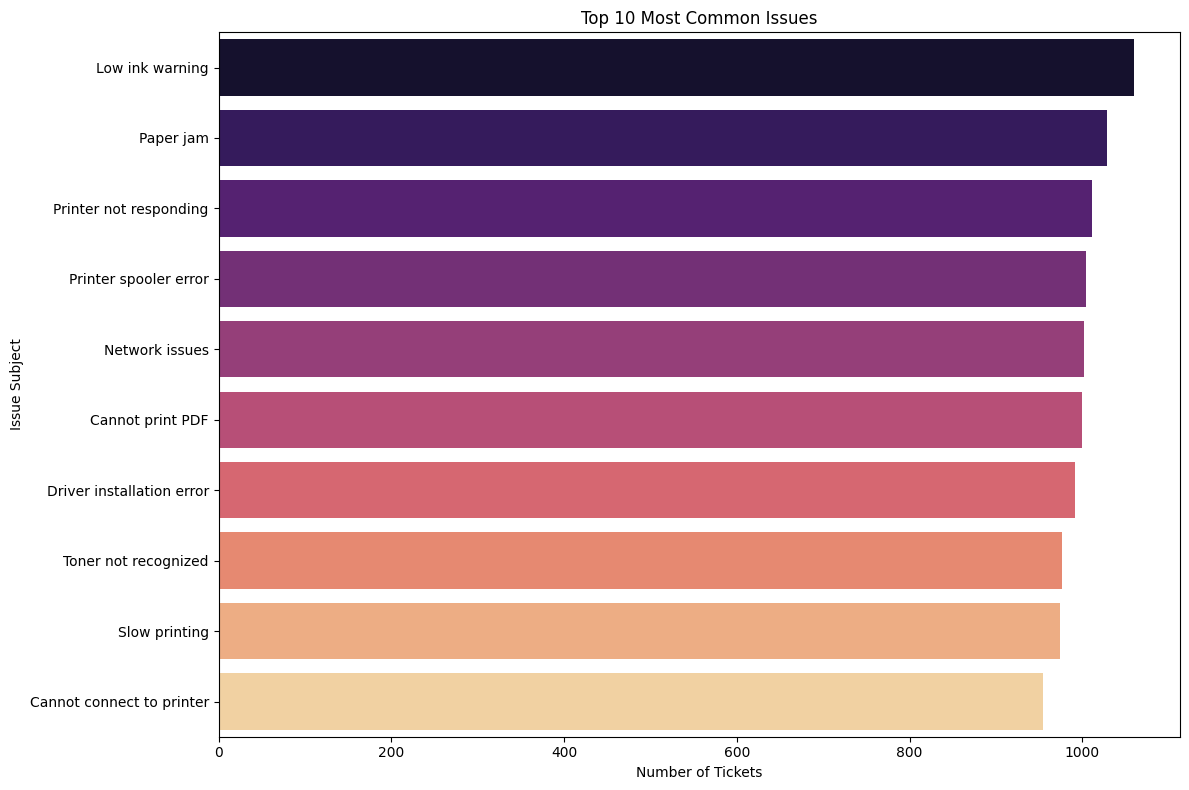

In [11]:
# Plot Top 10 Most Common Issues
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='subject', order=df['subject'].value_counts().index, palette='magma')
plt.title('Top 10 Most Common Issues')
plt.xlabel('Number of Tickets')
plt.ylabel('Issue Subject')
plt.tight_layout()
plt.show()


### Issues per service

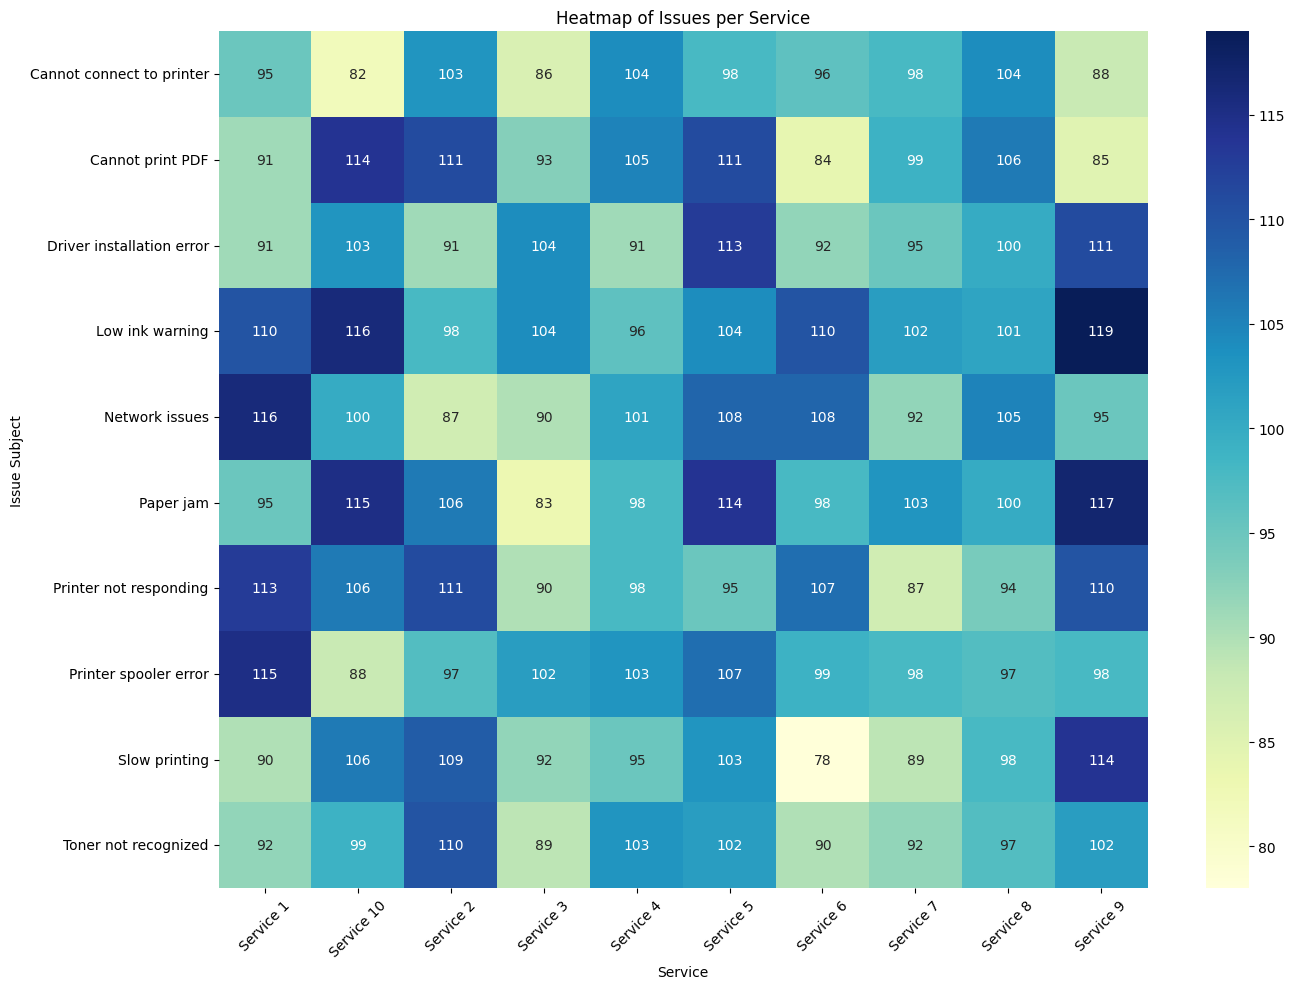

In [12]:
# Create a heatmap of Issues per Service
issue_service = pd.crosstab(df['subject'], df['service'])

plt.figure(figsize=(14, 10))
sns.heatmap(issue_service, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Issues per Service')
plt.xlabel('Service')
plt.ylabel('Issue Subject')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Gap Analysis

### Distribution of gaps in request numbers

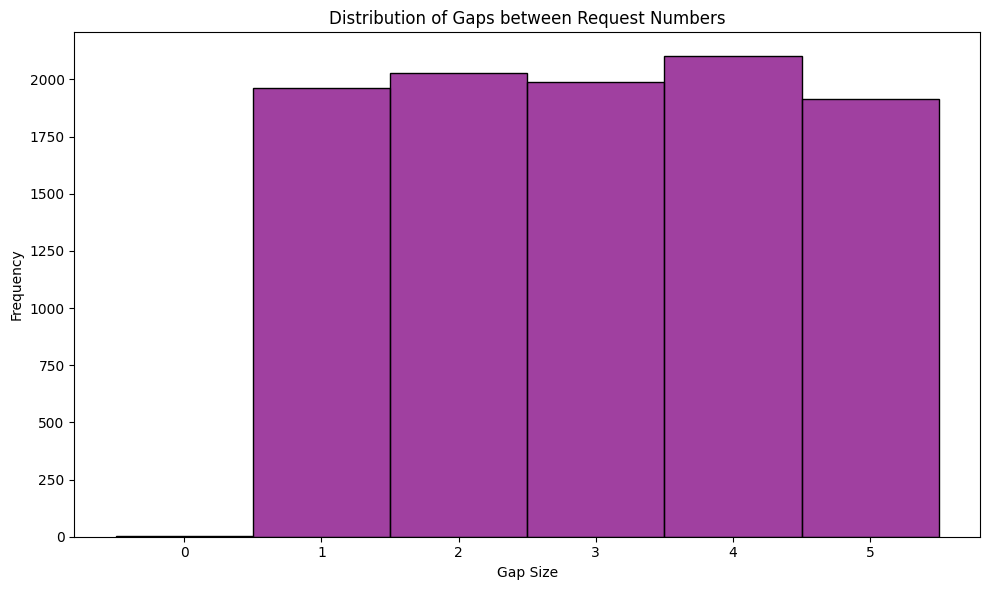

In [13]:
# Sort by req# and calculate gaps
df_sorted_req = df.sort_values('req#')
df_sorted_req['req_gap'] = df_sorted_req['req#'].diff().fillna(0).astype(int)

# Plot Histogram of Request Gaps
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted_req['req_gap'], bins=range(0, 6), discrete=True, color='purple')
plt.title('Distribution of Gaps between Request Numbers')
plt.xlabel('Gap Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Time between consecutive tickets

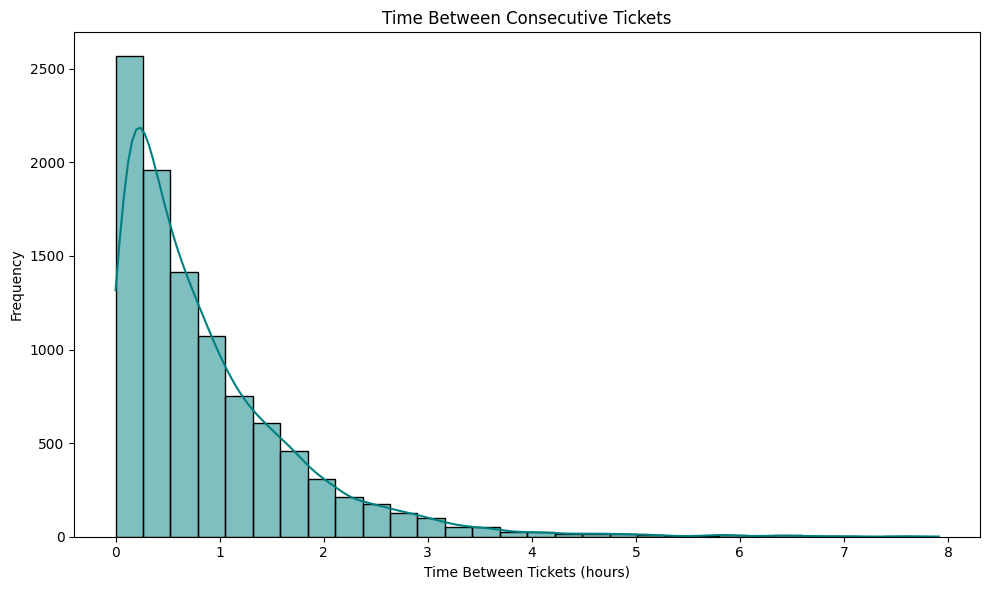

In [15]:
# Sort by logged_date and calculate time between tickets
df_sorted_date = df.sort_values('logged_date')
df_sorted_date['time_between_tickets'] = df_sorted_date['logged_date'].diff().dt.total_seconds() / 3600  # in hours

# Plot Histogram of Time Between Tickets
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted_date['time_between_tickets'].dropna(), bins=30, kde=True, color='teal')
plt.title('Time Between Consecutive Tickets')
plt.xlabel('Time Between Tickets (hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Outlier Detection

### Identify Outliers in Resolution Time

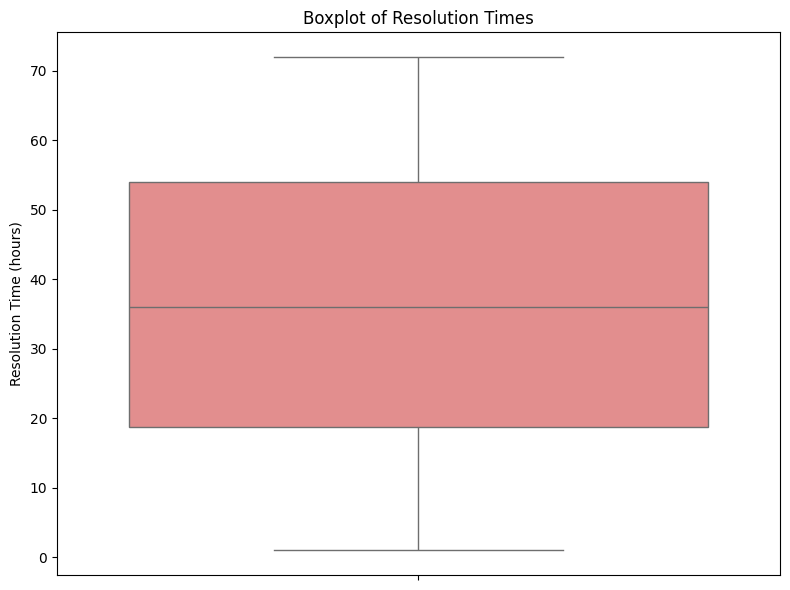

Outliers in Resolution Time:
Empty DataFrame
Columns: [severity, req#, service, resolution_time]
Index: []


In [17]:
# Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='resolution_time', color='lightcoral')
plt.title('Boxplot of Resolution Times')
plt.ylabel('Resolution Time (hours)')
plt.tight_layout()
plt.show()

# Identify outliers using IQR
Q1 = df['resolution_time'].quantile(0.25)
Q3 = df['resolution_time'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['resolution_time'] < (Q1 - 1.5 * IQR)) | (df['resolution_time'] > (Q3 + 1.5 * IQR))]

print("Outliers in Resolution Time:")
print(outliers[['severity', 'req#', 'service', 'resolution_time']])
